# Постановка задачи

Автомобильная компания планирует выйти на новый рынок с имеющимся арсеналом товаров. После проведенного исследования стало понятно, что поведение нового рынка идентично поведению старого. При работе со старым рынком отдел продаж сегментировал всех покупателей на 4 группы А, В, С, D. Эта стратегия хорошо сработала и на новом рынке. Так как было выявлено 2627 новых клиентов, то требуется спрогнозировать подходящую группу для этих клиентов.

База данных: https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation?datasetId=841888&language=Python

In [1]:
import numpy as np              
import pandas as pd            
import matplotlib.pyplot as plt 
import seaborn as sns           
import sklearn

# Чтение данных

Клиенты компании

In [2]:
data = pd.read_csv('D:\\Train.csv')
data

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


Потенциальные клиенты

In [3]:
data_test = pd.read_csv('D:\\Test.csv')
data_test

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


Всего в задаче 11 признаков:
1. ID - уникальный номер клиента
2. Gender - пол
3. Ever_Married - семейный статус
4. Age - возраст
5. Graduated - образование
6. Profession - профессия
7. Work_Experience - стаж работы
8. Spending_Score - оценка расходов
9. Family_Size - количество членов семьи
10. Var_1 - категория клиента
11. Segmentation - группа (сегмент) клиента

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [5]:
data["Gender"] = data["Gender"].astype('category')
data["Ever_Married"] = data["Ever_Married"].astype('category')
data["Graduated"] = data["Graduated"].astype('category')
data["Profession"] = data["Profession"].astype('category')
data["Spending_Score"] = data["Spending_Score"].astype('category')
data["Var_1"] = data["Var_1"].astype('category')
data["Segmentation"] = data["Segmentation"].astype('category')

In [6]:
data["Gender"].dtype,data["Ever_Married"].dtype,data["Graduated"].dtype,data["Profession"].dtype,data["Spending_Score"].dtype,data["Var_1"].dtype,data["Segmentation"].dtype 

(CategoricalDtype(categories=['Female', 'Male'], ordered=False),
 CategoricalDtype(categories=['No', 'Yes'], ordered=False),
 CategoricalDtype(categories=['No', 'Yes'], ordered=False),
 CategoricalDtype(categories=['Artist', 'Doctor', 'Engineer', 'Entertainment', 'Executive',
                   'Healthcare', 'Homemaker', 'Lawyer', 'Marketing'],
 , ordered=False),
 CategoricalDtype(categories=['Average', 'High', 'Low'], ordered=False),
 CategoricalDtype(categories=['Cat_1', 'Cat_2', 'Cat_3', 'Cat_4', 'Cat_5', 'Cat_6',
                   'Cat_7'],
 , ordered=False),
 CategoricalDtype(categories=['A', 'B', 'C', 'D'], ordered=False))

# Визуализация данных

In [7]:
data.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [8]:
data.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


Можно отметить существенную разницу в максимальном и минимальном возрасте клиентов в 71 год и отсутствие у множества клиентов опыта работы

In [9]:
data.describe(include=['category'])

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
count,8068,7928,7990,7944,8068,7992,8068
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,D
freq,4417,4643,4968,2516,4878,5238,2268


Большая часть клиентов компании - мужчины с образованием и низким уровнем дохода, состоящие в браке и принадлежащие группе D

In [10]:
data_corr = data.corr(numeric_only = True)
data_corr

,ID,Age,Work_Experience,Family_Size
ID,1.000000,-0.005055,-0.030688,0.011801
Age,-0.005055,1.000000,-0.190789,-0.280517
Work_Experience,-0.030688,-0.190789,1.000000,-0.063234
Family_Size,0.011801,-0.280517,-0.063234,1.000000


<Axes: >

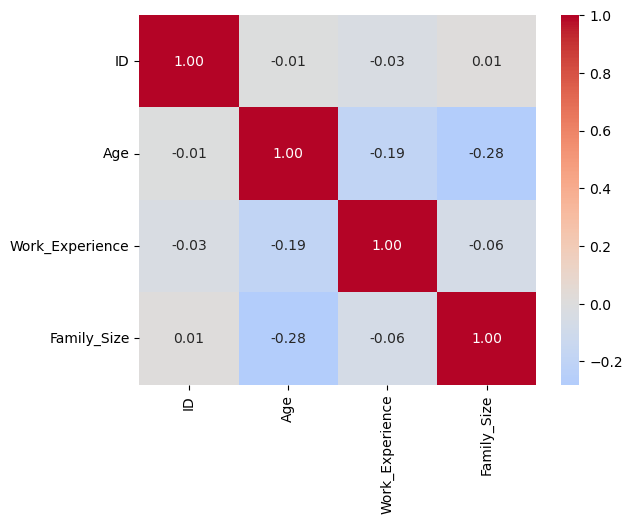

In [11]:
sns.heatmap(data_corr, annot=True, fmt='.2f', cmap='coolwarm', center = 0)

Существует несильно выраженная отрицательная корреляция возраста клиента c количеством членов его семьи 

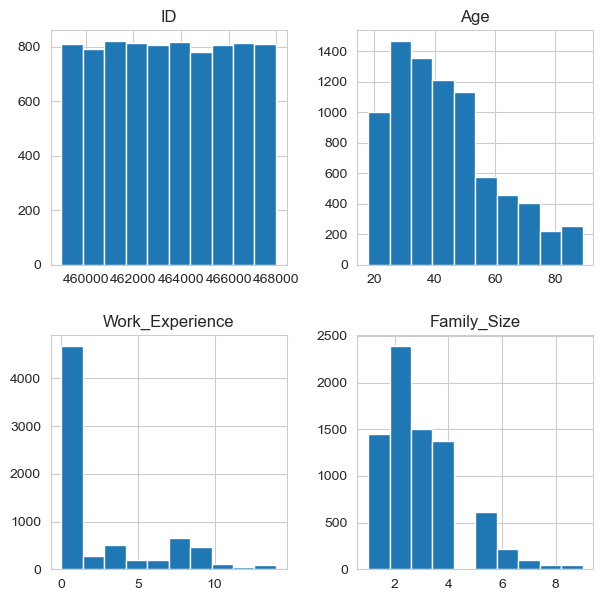

In [12]:
sns.set_style('whitegrid')
numbers = pd.Series(data.columns)
data[numbers].hist(figsize=(7,7))
plt.show()

У большинства клиентов компании мало опыта работы и меньше 4 членов семьи

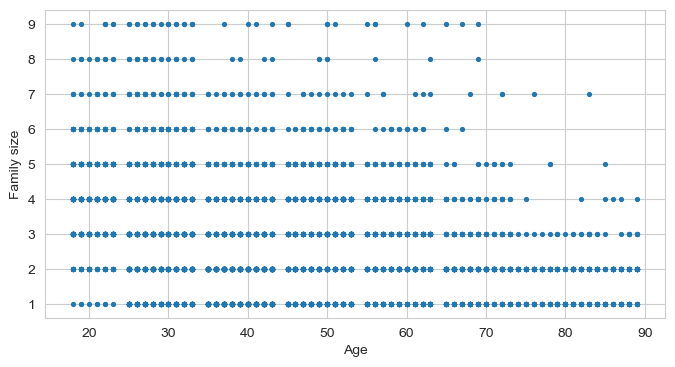

In [13]:
fig, ax = plt.subplots(figsize=(8, 4))
plt.scatter(x = data['Age'], y = data['Family_Size'], marker = ".", s = 30)
plt.xlabel("Age")
plt.ylabel("Family size")

plt.show()

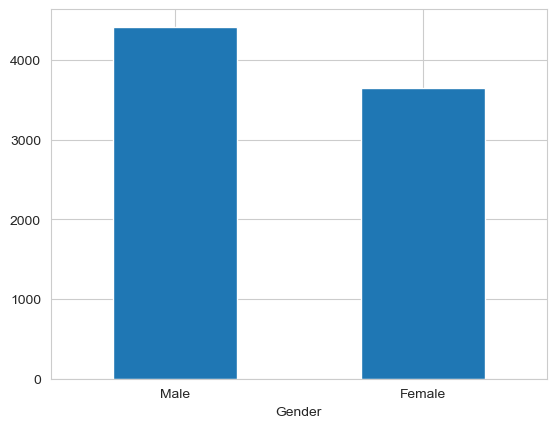

In [14]:
data.Gender.value_counts().plot(kind='bar', rot = 0)
plt.xlabel("Gender")

plt.show()

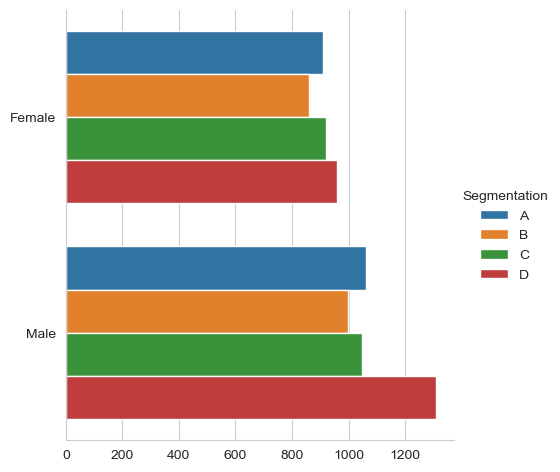

In [15]:
sns.catplot(y='Gender', hue='Segmentation', data=data, kind='count')
plt.xlabel("")
plt.ylabel("")

plt.show()

Мужчин-клиентов компании несколько больше, чем женщин. Распределения клиентов компании по группам для мужчин и женщин практически совпадают, за исключением только группы D, где больше всего мужчин

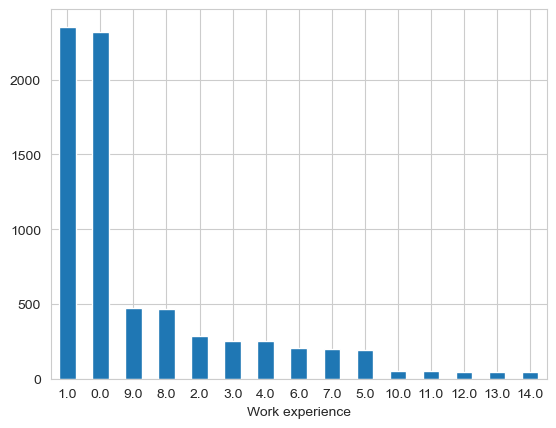

In [16]:
data.Work_Experience.value_counts().plot(kind='bar', rot = 0)
plt.xlabel("Work experience")
plt.ylabel("")

plt.show()

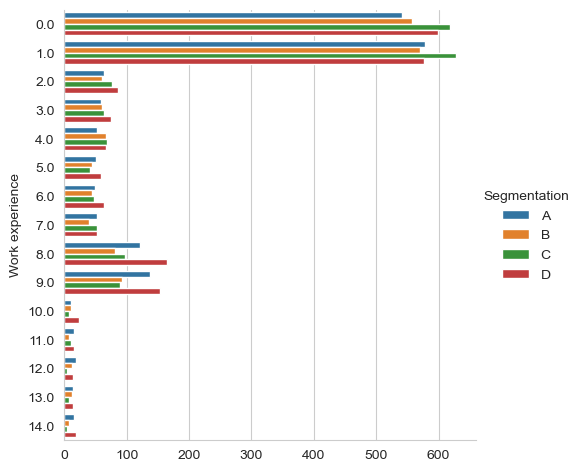

In [17]:
sns.catplot(y='Work_Experience', hue='Segmentation', data=data, kind='count')
plt.xlabel("")
plt.ylabel('Work experience')

plt.show()

Множество клиентов автомобильной компании имеют малый опыт работы

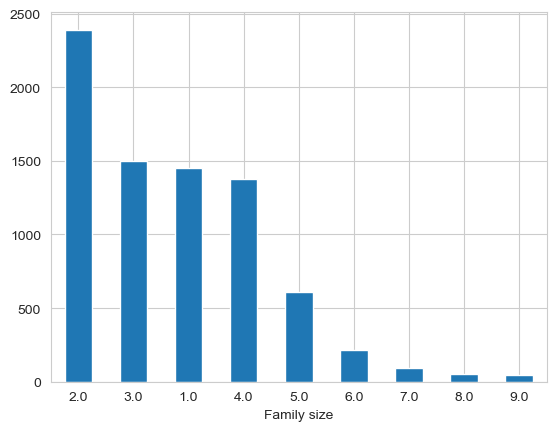

In [18]:
data.Family_Size.value_counts().plot(kind='bar', rot = 0)
plt.xlabel("Family size")

plt.show()

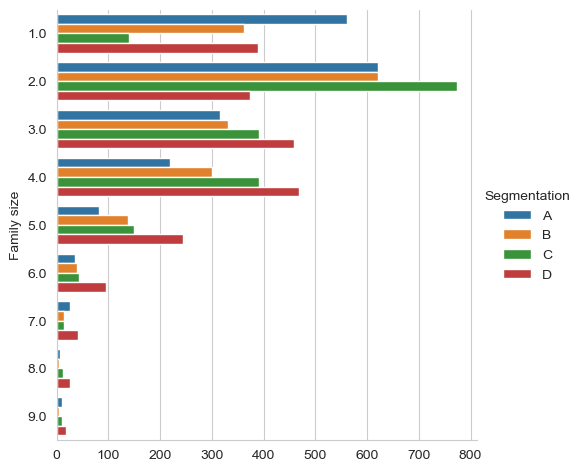

In [19]:
sns.catplot(y='Family_Size', hue='Segmentation', data=data, kind='count')
plt.ylabel("Family size")
plt.xlabel("")

plt.show()

Во многих семьях клиентов компании не больше 3 человек, количество членов семьи потенциального клиента оказывает существенное влияние на определение его в группу

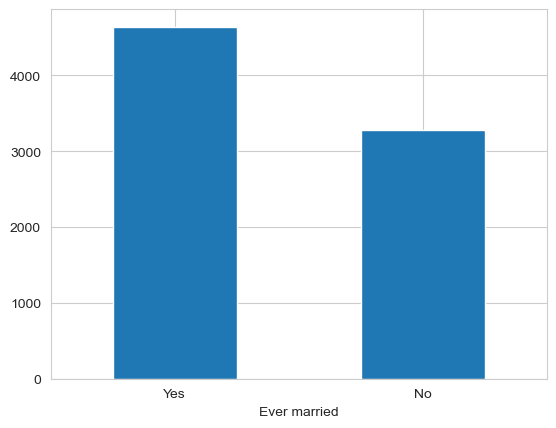

In [20]:
data.Ever_Married.value_counts().plot(kind='bar', rot = 0)
plt.xlabel("Ever married")

plt.show()

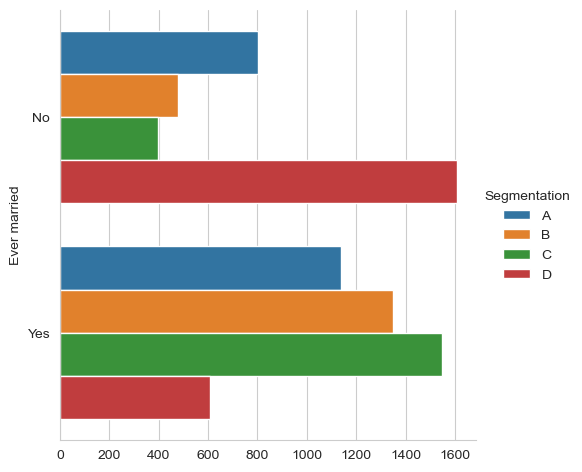

In [21]:
sns.catplot(y='Ever_Married', hue='Segmentation', data=data, kind='count')
plt.ylabel("Ever married")
plt.xlabel("")

plt.show()

Среди клиентов компании больше состоящих в браке людей. В группе D больше не состоящих в браке людей, в остальных группах наоборот

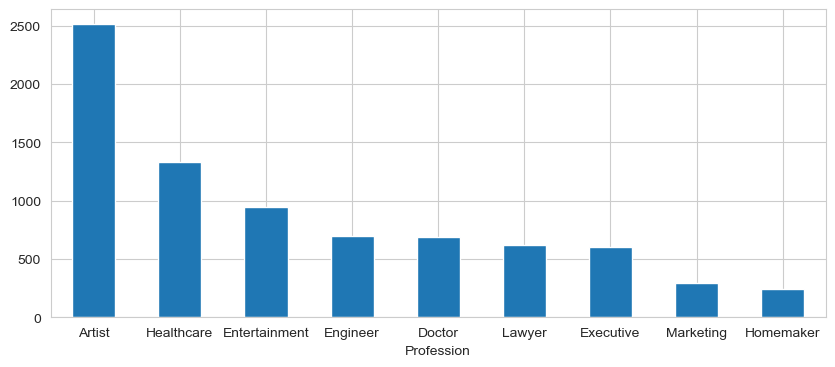

In [22]:
fig, ax = plt.subplots(figsize=(10, 4))
data.Profession.value_counts().plot(kind='bar', rot = 0)
plt.xlabel("Profession")
plt.ylabel("")

plt.show()

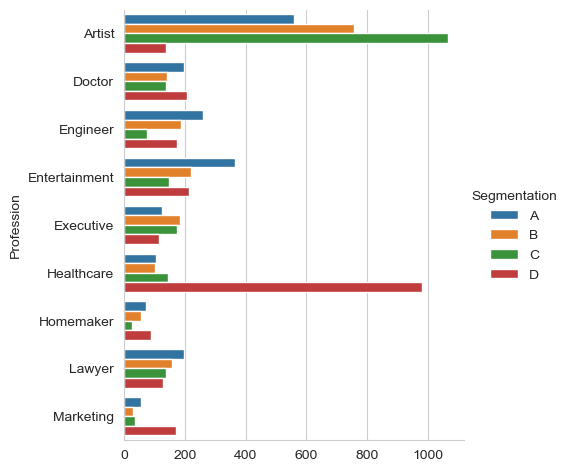

In [23]:
sns.catplot(y='Profession', hue='Segmentation', data=data, kind='count')
plt.ylabel("Profession")
plt.xlabel("")

plt.show()

Среди клиентов компании большинство занимаются искусством или работают в сфере здравоохранения. Почти все мед. работники принадлежат группе D, а художники - группе C. В группе A много художников, докторов, инженеров и работников сферы развлечений.

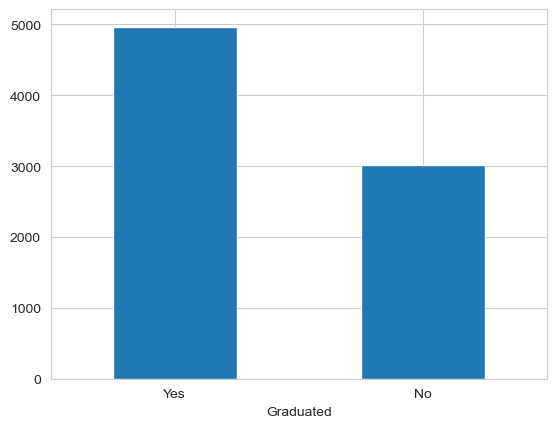

In [24]:
data.Graduated.value_counts().plot(kind='bar', rot = 0)
plt.xlabel("Graduated")
plt.ylabel("")

plt.show()

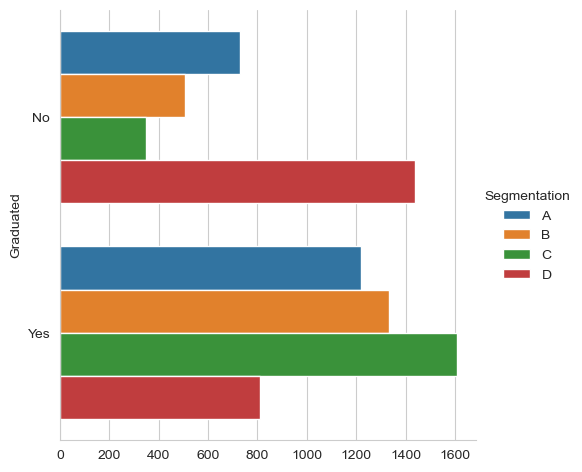

In [25]:
sns.catplot(y='Graduated', hue='Segmentation', data=data, kind='count')
plt.ylabel("Graduated")
plt.xlabel("")

plt.show()

Отношение числа имеющих образование к числу неимеющих образования клиентов равно примерно 5 : 3. В группе D преобладают клиенты без образования, а в остальных группах - с образованием. Наиболее явно эта зависимость выражена для группы C.

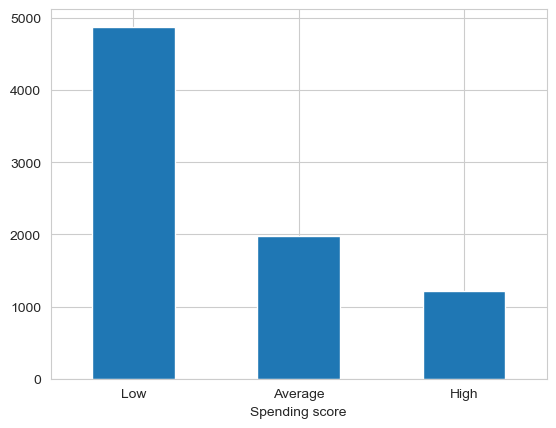

In [26]:
data.Spending_Score.value_counts().plot(kind='bar', rot = 0)
plt.xlabel("Spending score")
plt.ylabel("")

plt.show()

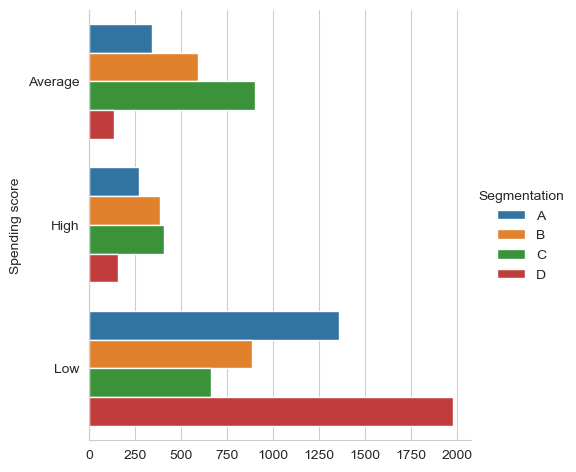

In [27]:
sns.catplot(y='Spending_Score', hue='Segmentation', data=data, kind='count')
plt.ylabel("Spending score")
plt.xlabel("")

plt.show()

Примерно у 60% клиентов компании низкий уровень дохода, они занимают большую часть групп A и D

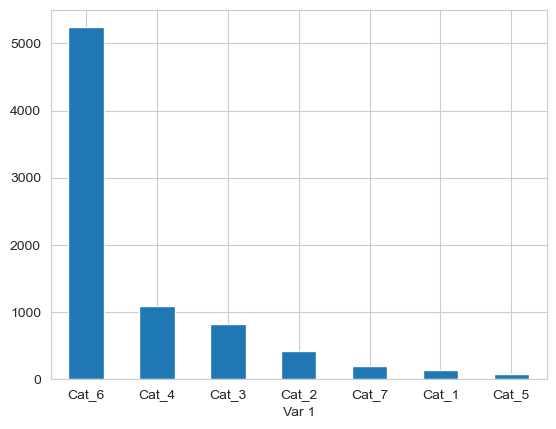

In [28]:
data.Var_1.value_counts().plot(kind='bar', rot = 0)
plt.xlabel("Var 1")
plt.ylabel("")

plt.show()

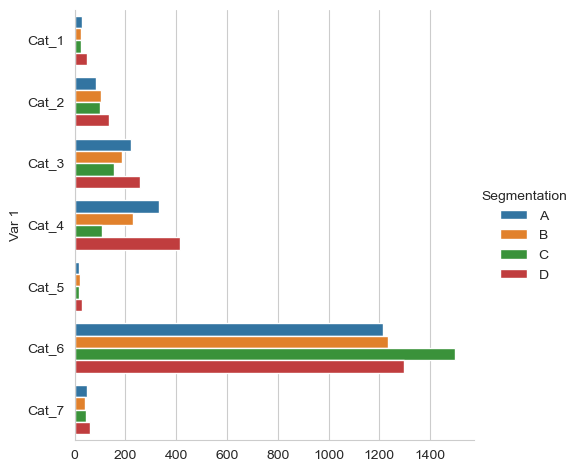

In [29]:
sns.catplot(y='Var_1', hue='Segmentation', data=data, kind='count')
plt.ylabel("Var 1")
plt.xlabel("")

plt.show()

Распределение клиентов внутри каждой группы примерно одинаковые, чаще преобладает группа D (за исключением Cat_6, где больше клиентов из группы C). Среди клиентов компании практически нет принадлежащих категориям Cat_1, Cat_5 и Cat_7

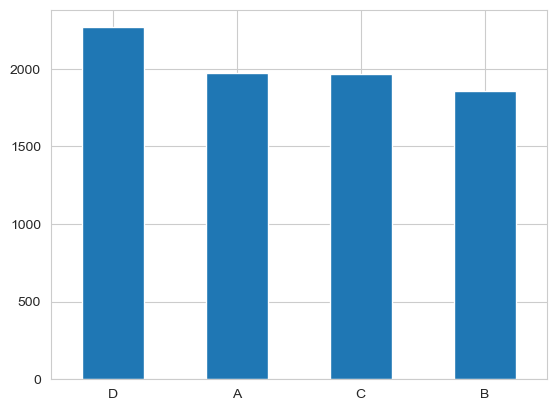

In [30]:
data.Segmentation.value_counts().plot(kind='bar', rot = 0)
plt.xlabel("")
plt.ylabel("")

plt.show()

В группе D несколько больше клиентов компании, нежели в других. В группах A, B и C клиентов практически поровну

Диаграмма рассеивания относительно группы клиентов

In [31]:
data  = data.drop(columns='ID')

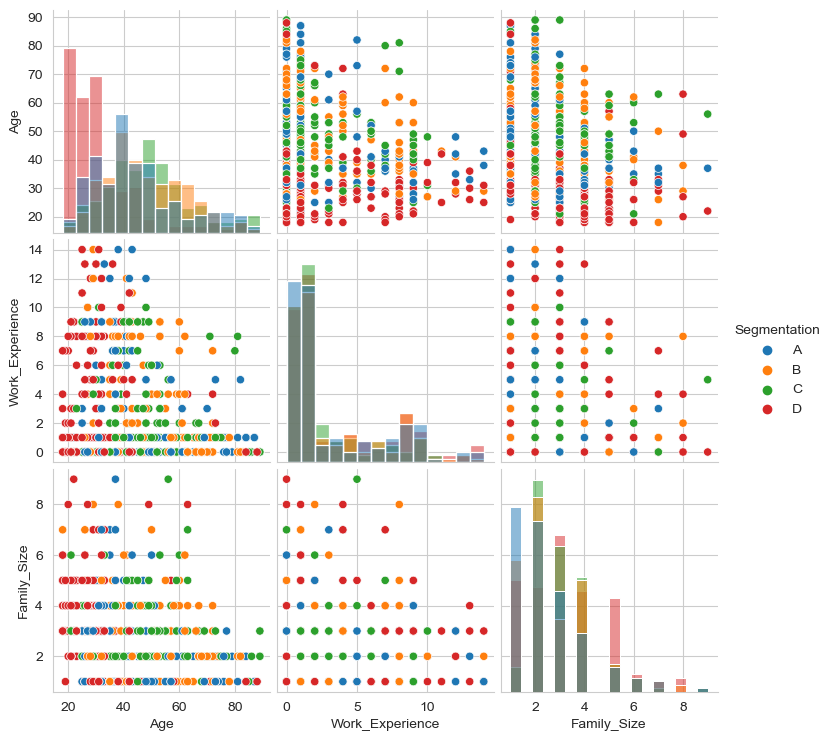

In [32]:
sns.pairplot(data.iloc[np.random.choice(np.arange(data.shape[0]), size=700, replace=False)], hue='Segmentation', diag_kind='hist')

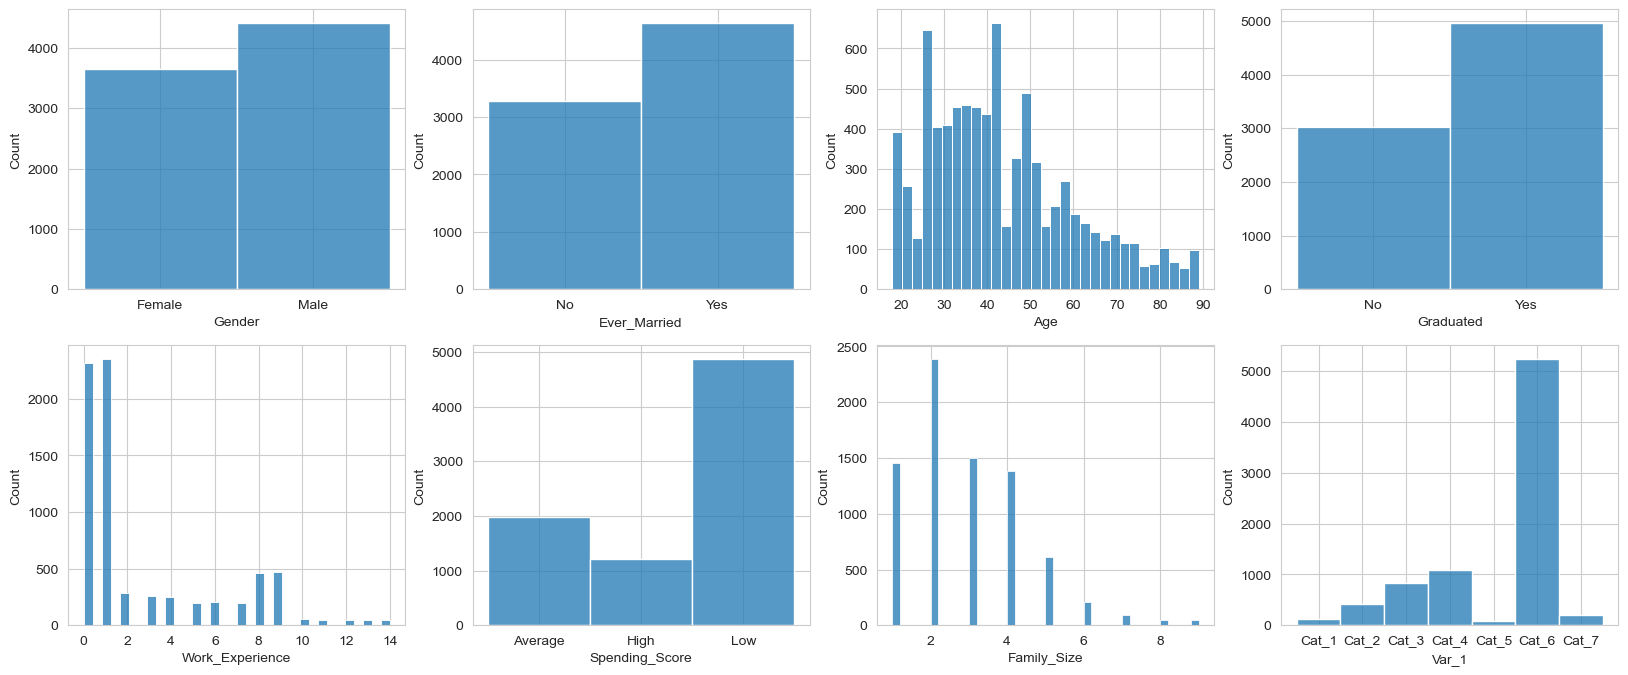

In [33]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
sns.histplot(data=data, x='Gender', ax=axes[0,0]);
sns.histplot(data=data, x='Ever_Married', ax=axes[0,1]);
sns.histplot(data=data, x='Age', ax=axes[0,2]);
sns.histplot(data=data, x='Graduated', ax=axes[0,3]);
sns.histplot(data=data, x='Work_Experience', ax=axes[1,0]);
sns.histplot(data=data, x='Spending_Score', ax=axes[1,1]);
sns.histplot(data=data, x='Family_Size', ax=axes[1,2]);
sns.histplot(data=data, x='Var_1', ax=axes[1,3]);

Дублирующиеся данные

In [34]:
data = data.drop_duplicates()

Пропущенные значения

In [35]:
data_main = data.copy(deep = True)
data_main.head(10)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [36]:
A = data.isnull()
A.head()
print('Missing values:', A.sum(), sep='\n')

Missing values:
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    806
Spending_Score       0
Family_Size        332
Var_1               76
Segmentation         0
dtype: int64


In [37]:
data_train = data_main.copy(deep = True)

In [38]:
A = data_train.isnull()
A.head()
print('Missing values:', A.sum(), sep='\n')

Missing values:
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    806
Spending_Score       0
Family_Size        332
Var_1               76
Segmentation         0
dtype: int64


In [39]:
data = data_main.copy(deep = True)
data.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    806
Spending_Score       0
Family_Size        332
Var_1               76
Segmentation         0
dtype: int64

In [40]:
data['Var_1'].mode()

0    Cat_6
Name: Var_1, dtype: category
Categories (7, object): ['Cat_1', 'Cat_2', 'Cat_3', 'Cat_4', 'Cat_5', 'Cat_6', 'Cat_7']

Заполним пропуски наиболее частыми значениями

In [41]:
data['Ever_Married'].fillna('No', inplace=True)

In [42]:
data['Graduated'].fillna('No', inplace=True)

In [43]:
data.dropna(subset=["Profession"], inplace=True)

In [44]:
data['Work_Experience'].fillna(0, inplace=True)

In [45]:
data['Family_Size'].fillna(data_train['Family_Size'].mode, inplace=True)

In [46]:
data['Var_1'].fillna("Cat_6", inplace=True)

In [47]:
A = data.isnull()
A.head()
print('Missing values by features:', A.sum(), sep='\n')

Missing values by features:
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64


Категориальные признаки

In [48]:
from sklearn.preprocessing import  LabelEncoder
le = LabelEncoder()

data_train['Gender'] = le.fit_transform(data_train['Gender'])
Gender_mapping = {l: i for i, l in enumerate(le.classes_)}
data_train['Ever_Married'] = le.fit_transform(data_train['Ever_Married'])
Ever_Married_mapping = {l: i for i, l in enumerate(le.classes_)}
data_train['Graduated'] = le.fit_transform(data_train['Graduated'])
Graduated_mapping = {l: i for i, l in enumerate(le.classes_)}
data_train['Spending_Score'] = le.fit_transform(data_train['Spending_Score'])
Spending_Score_mapping = {l: i for i, l in enumerate(le.classes_)}
data_train['Var_1'] = le.fit_transform(data_train['Var_1'])
Var_1_mapping = {l: i for i, l in enumerate(le.classes_)}
data_train['Profession'] = le.fit_transform(data_train['Profession'])
Profession_mapping = {l: i for i, l in enumerate(le.classes_)}
data_train['Family_Size'] = le.fit_transform(data_train['Family_Size'])
Family_Size_mapping = {l: i for i, l in enumerate(le.classes_)}
data_train['Work_Experience'] = le.fit_transform(data_train['Work_Experience'])
Work_Experience_mapping = {l: i for i, l in enumerate(le.classes_)}
data_train['Age'] = le.fit_transform(data_train['Age'])
Age_mapping = {l: i for i, l in enumerate(le.classes_)}
data_train['Segmentation'] = le.fit_transform(data_train['Segmentation'])
Segmentation_mapping = {l: i for i, l in enumerate(le.classes_)}

In [49]:
print(Gender_mapping, Ever_Married_mapping, Graduated_mapping, Spending_Score_mapping, Profession_mapping, Family_Size_mapping, Work_Experience_mapping, Var_1_mapping, Age_mapping, Segmentation_mapping)

{'Female': 0, 'Male': 1} {'No': 0, 'Yes': 1, nan: 2} {'No': 0, 'Yes': 1, nan: 2} {'Average': 0, 'High': 1, 'Low': 2} {'Artist': 0, 'Doctor': 1, 'Engineer': 2, 'Entertainment': 3, 'Executive': 4, 'Healthcare': 5, 'Homemaker': 6, 'Lawyer': 7, 'Marketing': 8, nan: 9} {1.0: 0, 2.0: 1, 3.0: 2, 4.0: 3, 5.0: 4, 6.0: 5, 7.0: 6, 8.0: 7, 9.0: 8, nan: 9} {0.0: 0, 1.0: 1, 2.0: 2, 3.0: 3, 4.0: 4, 5.0: 5, 6.0: 6, 7.0: 7, 8.0: 8, 9.0: 9, 10.0: 10, 11.0: 11, 12.0: 12, 13.0: 13, 14.0: 14, nan: 15} {'Cat_1': 0, 'Cat_2': 1, 'Cat_3': 2, 'Cat_4': 3, 'Cat_5': 4, 'Cat_6': 5, 'Cat_7': 6, nan: 7} {18: 0, 19: 1, 20: 2, 21: 3, 22: 4, 23: 5, 25: 6, 26: 7, 27: 8, 28: 9, 29: 10, 30: 11, 31: 12, 32: 13, 33: 14, 35: 15, 36: 16, 37: 17, 38: 18, 39: 19, 40: 20, 41: 21, 42: 22, 43: 23, 45: 24, 46: 25, 47: 26, 48: 27, 49: 28, 50: 29, 51: 30, 52: 31, 53: 32, 55: 33, 56: 34, 57: 35, 58: 36, 59: 37, 60: 38, 61: 39, 62: 40, 63: 41, 65: 42, 66: 43, 67: 44, 68: 45, 69: 46, 70: 47, 71: 48, 72: 49, 73: 50, 74: 51, 75: 52, 76: 53

# Класификатор ближайших соседей

In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [51]:
dg = data_train.copy(deep=True)
data_train = data_train.drop('Segmentation', axis=1)

In [52]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(data_train, dg['Segmentation'], test_size=0.4, random_state=42)
xtrain_samples = x_train.shape[0]
xtest_samples = x_test.shape[0]
print(xtrain_samples, xtest_samples)

4590 3061


In [53]:
neighbours = [1,2,3,4,5,7,10,12,15,18,20]
errs_train = []
errs_test = []

for i in neighbours:    
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    y_train_predict = model.predict(x_train)
    y_test_predict  = model.predict(x_test)
    errs_train.append(np.mean(y_train != y_train_predict))
    errs_test.append(np.mean(y_test != y_test_predict))
    
mat = pd.DataFrame([errs_train, errs_test], columns = neighbours,index=["errs_train", "errs_test"])
mat   

,1,2,3,4,5,7,10,12,15,18,20
errs_train,0.028976,0.296514,0.321351,0.359695,0.385185,0.411765,0.434205,0.450327,0.457298,0.476471,0.473420
errs_test,0.590003,0.610585,0.567462,0.562235,0.561254,0.545573,0.546880,0.544593,0.544920,0.533812,0.532506


In [54]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train, y_train)
y_train_predict = model.predict(x_train)
y_test_predict  = model.predict(x_test)

print(np.mean(y_train != y_train_predict), np.mean(y_test != y_test_predict))
print(f'Accuracy Score train : {accuracy_score(y_train, y_train_predict)*100}')
print(f'Accuracy Score test : {accuracy_score(y_test, y_test_predict)*100}')
print("Confusion matrix")
cm_knn = confusion_matrix(y_test, y_test_predict)
print(cm_knn)

0.0289760348583878 0.5900032669062398
Accuracy Score train : 97.10239651416121
Accuracy Score test : 40.99967330937602
Confusion matrix
[[251 189 138 192]
 [194 228 205 101]
 [133 210 305  82]
 [179  92  91 471]]


In [55]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)
y_train_predict = model.predict(x_train)
y_test_predict  = model.predict(x_test)

print(np.mean(y_train != y_train_predict), np.mean(y_test != y_test_predict))
print(f'Accuracy Score train : {accuracy_score(y_train, y_train_predict)*100}')
print(f'Accuracy Score test : {accuracy_score(y_test, y_test_predict)*100}')
print("Confusion matrix")
cm_knn = confusion_matrix(y_test, y_test_predict)
print(cm_knn)

0.3213507625272331 0.5674616138516825
Accuracy Score train : 67.86492374727669
Accuracy Score test : 43.25383861483175
Confusion matrix
[[366 173  90 141]
 [293 209 150  76]
 [192 177 290  71]
 [249  78  47 459]]


In [56]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
y_train_predict = model.predict(x_train)
y_test_predict  = model.predict(x_test)

print(np.mean(y_train != y_train_predict), np.mean(y_test != y_test_predict))
print(f'Accuracy Score train : {accuracy_score(y_train, y_train_predict)*100}')
print(f'Accuracy Score test : {accuracy_score(y_test, y_test_predict)*100}')
print("Confusion matrix")
cm_knn = confusion_matrix(y_test, y_test_predict)
print(cm_knn)

0.3851851851851852 0.5612544919960797
Accuracy Score train : 61.48148148148148
Accuracy Score test : 43.87455080039203
Confusion matrix
[[360 174  86 150]
 [232 239 174  83]
 [138 226 284  82]
 [227  85  61 460]]


При предсказывании группы потенциального клиента методом ближайших соседей при k = 1 получили точность классификации около 97% на обучающей выборке и 40% на тестовой. При увеличении числа соседей наблюдается уменьшение точности на обучающей выборке и несущественный рост точности на тестовой.